In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score, f1_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Read in the data and store in a DataFrame
df = pd.read_csv("data/titles.csv")

# Print the first 5 rows of the DataFrame
df.dropna(inplace=True)
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2151.0,1.487,7.000
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,308824.0,130.213,8.301
44,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,34115.0,50.267,7.500
45,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'comedy', 'fantasy', '...",['GB'],24.0,tt0086815,6.5,5104.0,42.196,6.500


In [165]:
df['genreMain'] = df['genres'].apply(lambda x: x.split(',')[0])

genre_mapping = {
#     "['documentation']": "documentary",
#     "['drama']": "drama",
#     "['fantasy']": "fantasy",
#     "['war']": "war",
#     "['comedy']": "comedy",
#     "['thriller']": "thriller",
#     "['crime']": "crime",
#     "['romance']": "romance",
#     "['action']": "action",
#     "['western']": "western",
#     "['history']": "history",
#     "['music']": "music",
#     "['horror']": "horror",
#     "['scifi']": "sci-fi",
#     "['animation']": "animation",
#     "['family']": "family",
#     "['reality']": "reality",
#     '[]': "unknown",
#     "['sport']": "sport"
    
    "['documentation']": "documentary",
    "['drama'": "drama",
    "['fantasy'": "fantasy",
    "['war'": "war",
    "['comedy'": "comedy",
    "['comedy']": "comedy",
    "['thriller'": "thriller",
    "['crime'": "crime",
    "['romance'": "romance",
    "['action'": "action",
    "['western'": "western",
    "['history'": "history",
    "['drama']": "drama",
    "['music'": "music",
    "['romance']": "romance",
    "['horror'": "horror",
    "['horror'": "horror",
    "['scifi'": "sci-fi",
    "['animation'": "animation",
    "['family'": "family",
    "['family']": "family",
    "['reality']": "reality",
    "['reality'": "reality",
    "['documentation'": "documentary",
    '[]': "unknown",
    "['thriller']": "thriller",
    "['western']": "western",
    "['animation']": "animation",
    "['war']": "war",
    "['music']": "music",
    "['fantasy']": "fantasy",
    "['action']": "action",
    "['crime']": "crime",
    "['scifi']": "sci-fi",
    "['sport'": "sport"
}

df['genreMain'] = df['genreMain'].map(genre_mapping)
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'genreMain'],
      dtype='object')

In [166]:
oneHotdf=df[['release_year', 'runtime','seasons','imdb_score','imdb_votes','tmdb_popularity','tmdb_score','genreMain']]
oneHotdf.dropna(inplace=True)
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(oneHotdf[['genreMain']]).toarray())
final_df = pd.concat([oneHotdf.reset_index(drop=True), encoder_df], axis=1)
new_names = {0:'action',
             1:'animation',
             2:'comedy',
             3:'crime',
             4:'documentary',
             5:'drama',
             6:'family',
             7:'fantasy',
             8:'history',
             9:'horror',
             10:'music',
             11:'reality',
             12:'romance',
             13:'sci-fi',
             14:'sport',
             15:'thriller',
             16:'unknown',
             17:'war',
             18:'western'}
final_df = final_df.rename(columns=new_names)

C:\Users\drewj\AppData\Local\Temp\ipykernel_20428\2406819631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oneHotdf.dropna(inplace=True)


In [167]:
final_df[final_df['genreMain']=='fantasy']

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genreMain,action,animation,...,horror,music,reality,romance,sci-fi,sport,thriller,unknown,war,western
1276,2021,64,1.0,7.7,106385.0,73.108,7.613,fantasy,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
df['genreMain'].unique()

array(['comedy', 'sci-fi', 'animation', 'family', 'reality', 'action',
       'drama', 'crime', 'war', 'documentary', 'thriller', 'western',
       'history', 'unknown', 'horror', 'romance', 'sport', 'music',
       'fantasy'], dtype=object)

In [169]:
cols_to_normalize = ['imdb_score', 'tmdb_score', 'imdb_votes']

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(final_df[cols_to_normalize])

# Transform the columns
final_df[cols_to_normalize] = scaler.transform(final_df[cols_to_normalize])

## Lasso Regression

In [170]:
X = final_df[['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_score','documentary', 'drama', 'fantasy', 'war', 'comedy', 'thriller',
       'crime', 'romance', 'action', 'western', 'history', 'music','horror', 'sci-fi', 'animation', 'family', 'reality', 'unknown',
       'sport']]
y = final_df['tmdb_popularity']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit the Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# print the coefficients
print(lasso.coef_)
print(lasso.intercept_)

# make predictions on the test set and calculate the R-squared score
y_pred = lasso.predict(X_test)
print(lasso.score(X_test, y_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Calculate the R-squared
r2 = r2_score(y_test, y_pred)
print("R-Squared: {:.2f}".format(r2))

[  1.35599826   0.24652048   3.54594175  -2.14705971  28.03467558
   5.26065905  -9.65379386   0.43847993   0.           0.
  -2.17918171   3.00333297  -1.61977236   0.          34.50947433
  -0.          -0.          -0.          -0.          18.01601764
   0.16765123  -5.98141549 -19.27281704  -0.          -0.        ]
-2724.2842855624913
0.274336818653379
Mean Squared Error: 18929.44
R-Squared: 0.27


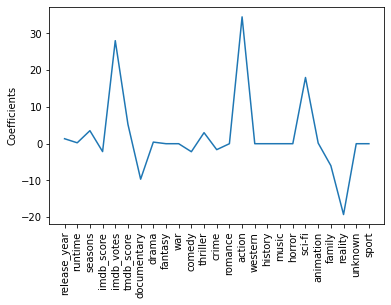

In [171]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Plot coefficients
plt.plot(range(X.shape[1]), lasso.coef_)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.ylabel('Coefficients')
plt.savefig("LassoResid.jpg")
plt.show()

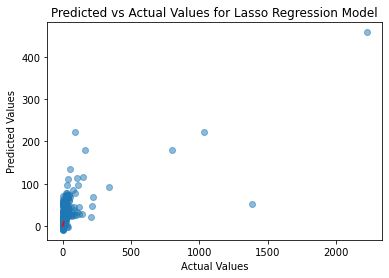

In [172]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 10], [0, 10], 'r-')
plt.title("Predicted vs Actual Values for Lasso Regression Model")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Ridge Regression

Mean Squared Error: 18929.533067150925
R-Squared: 0.27


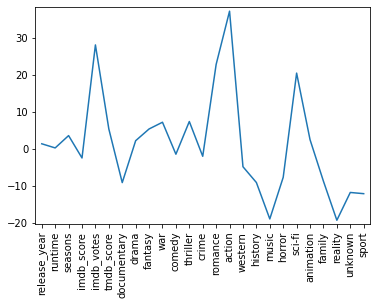

In [173]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print("R-Squared: {:.2f}".format(r2))

# Plot the coefficients
import matplotlib.pyplot as plt
plt.plot(range(X.shape[1]), ridge.coef_)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.margins(0.02)
plt.show()

## Linear Regression

In [174]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance using RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r_squared))

Root Mean Squared Error: 137.59
R-squared: 0.27


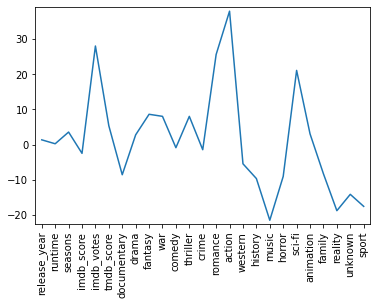

In [175]:
residuals = y_test - y_pred

plt.plot(range(X.shape[1]), lr_model.coef_)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.margins(0.02)
plt.show()

Root Mean Squared Error: 144.52
R-squared: 0.20


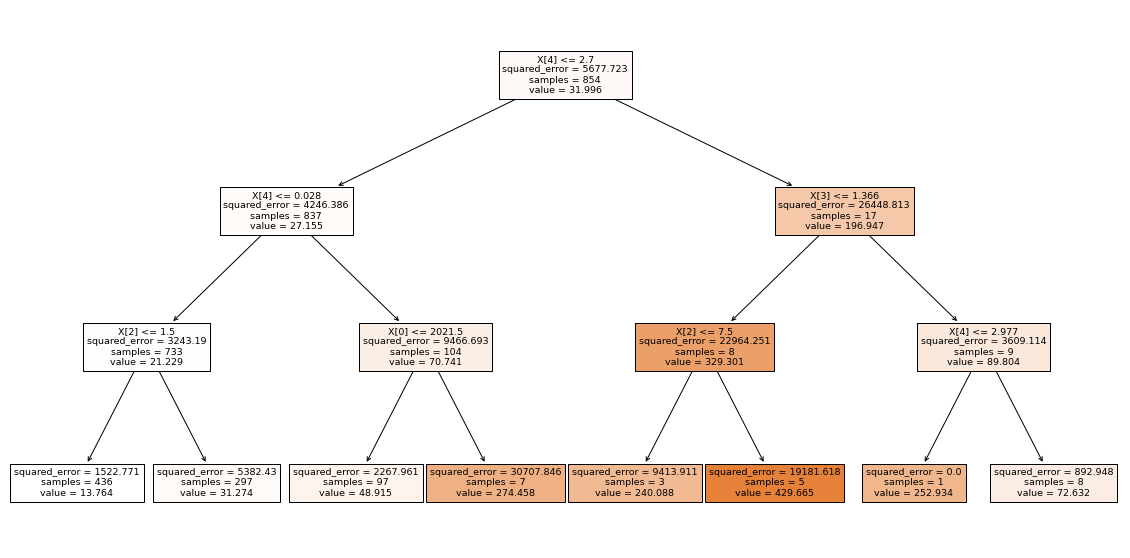

In [176]:
rf_model = RandomForestRegressor(max_depth=3,random_state=42)
rf_model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance using RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

# cm=confusion_matrix(y_test, y_pred)
# acc=accuracy_score(y_test, y_pred)
# f1=f1_score(y_test,y_pred)

print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r_squared))
# print("Accuracy Score: {:.2f}".format(acc))
# print("f1 Score: {:.2f}".format(f1))

plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], filled=True)
plt.savefig("rfr.jpg", dpi=300)
plt.show()

Accuracy: 0.35


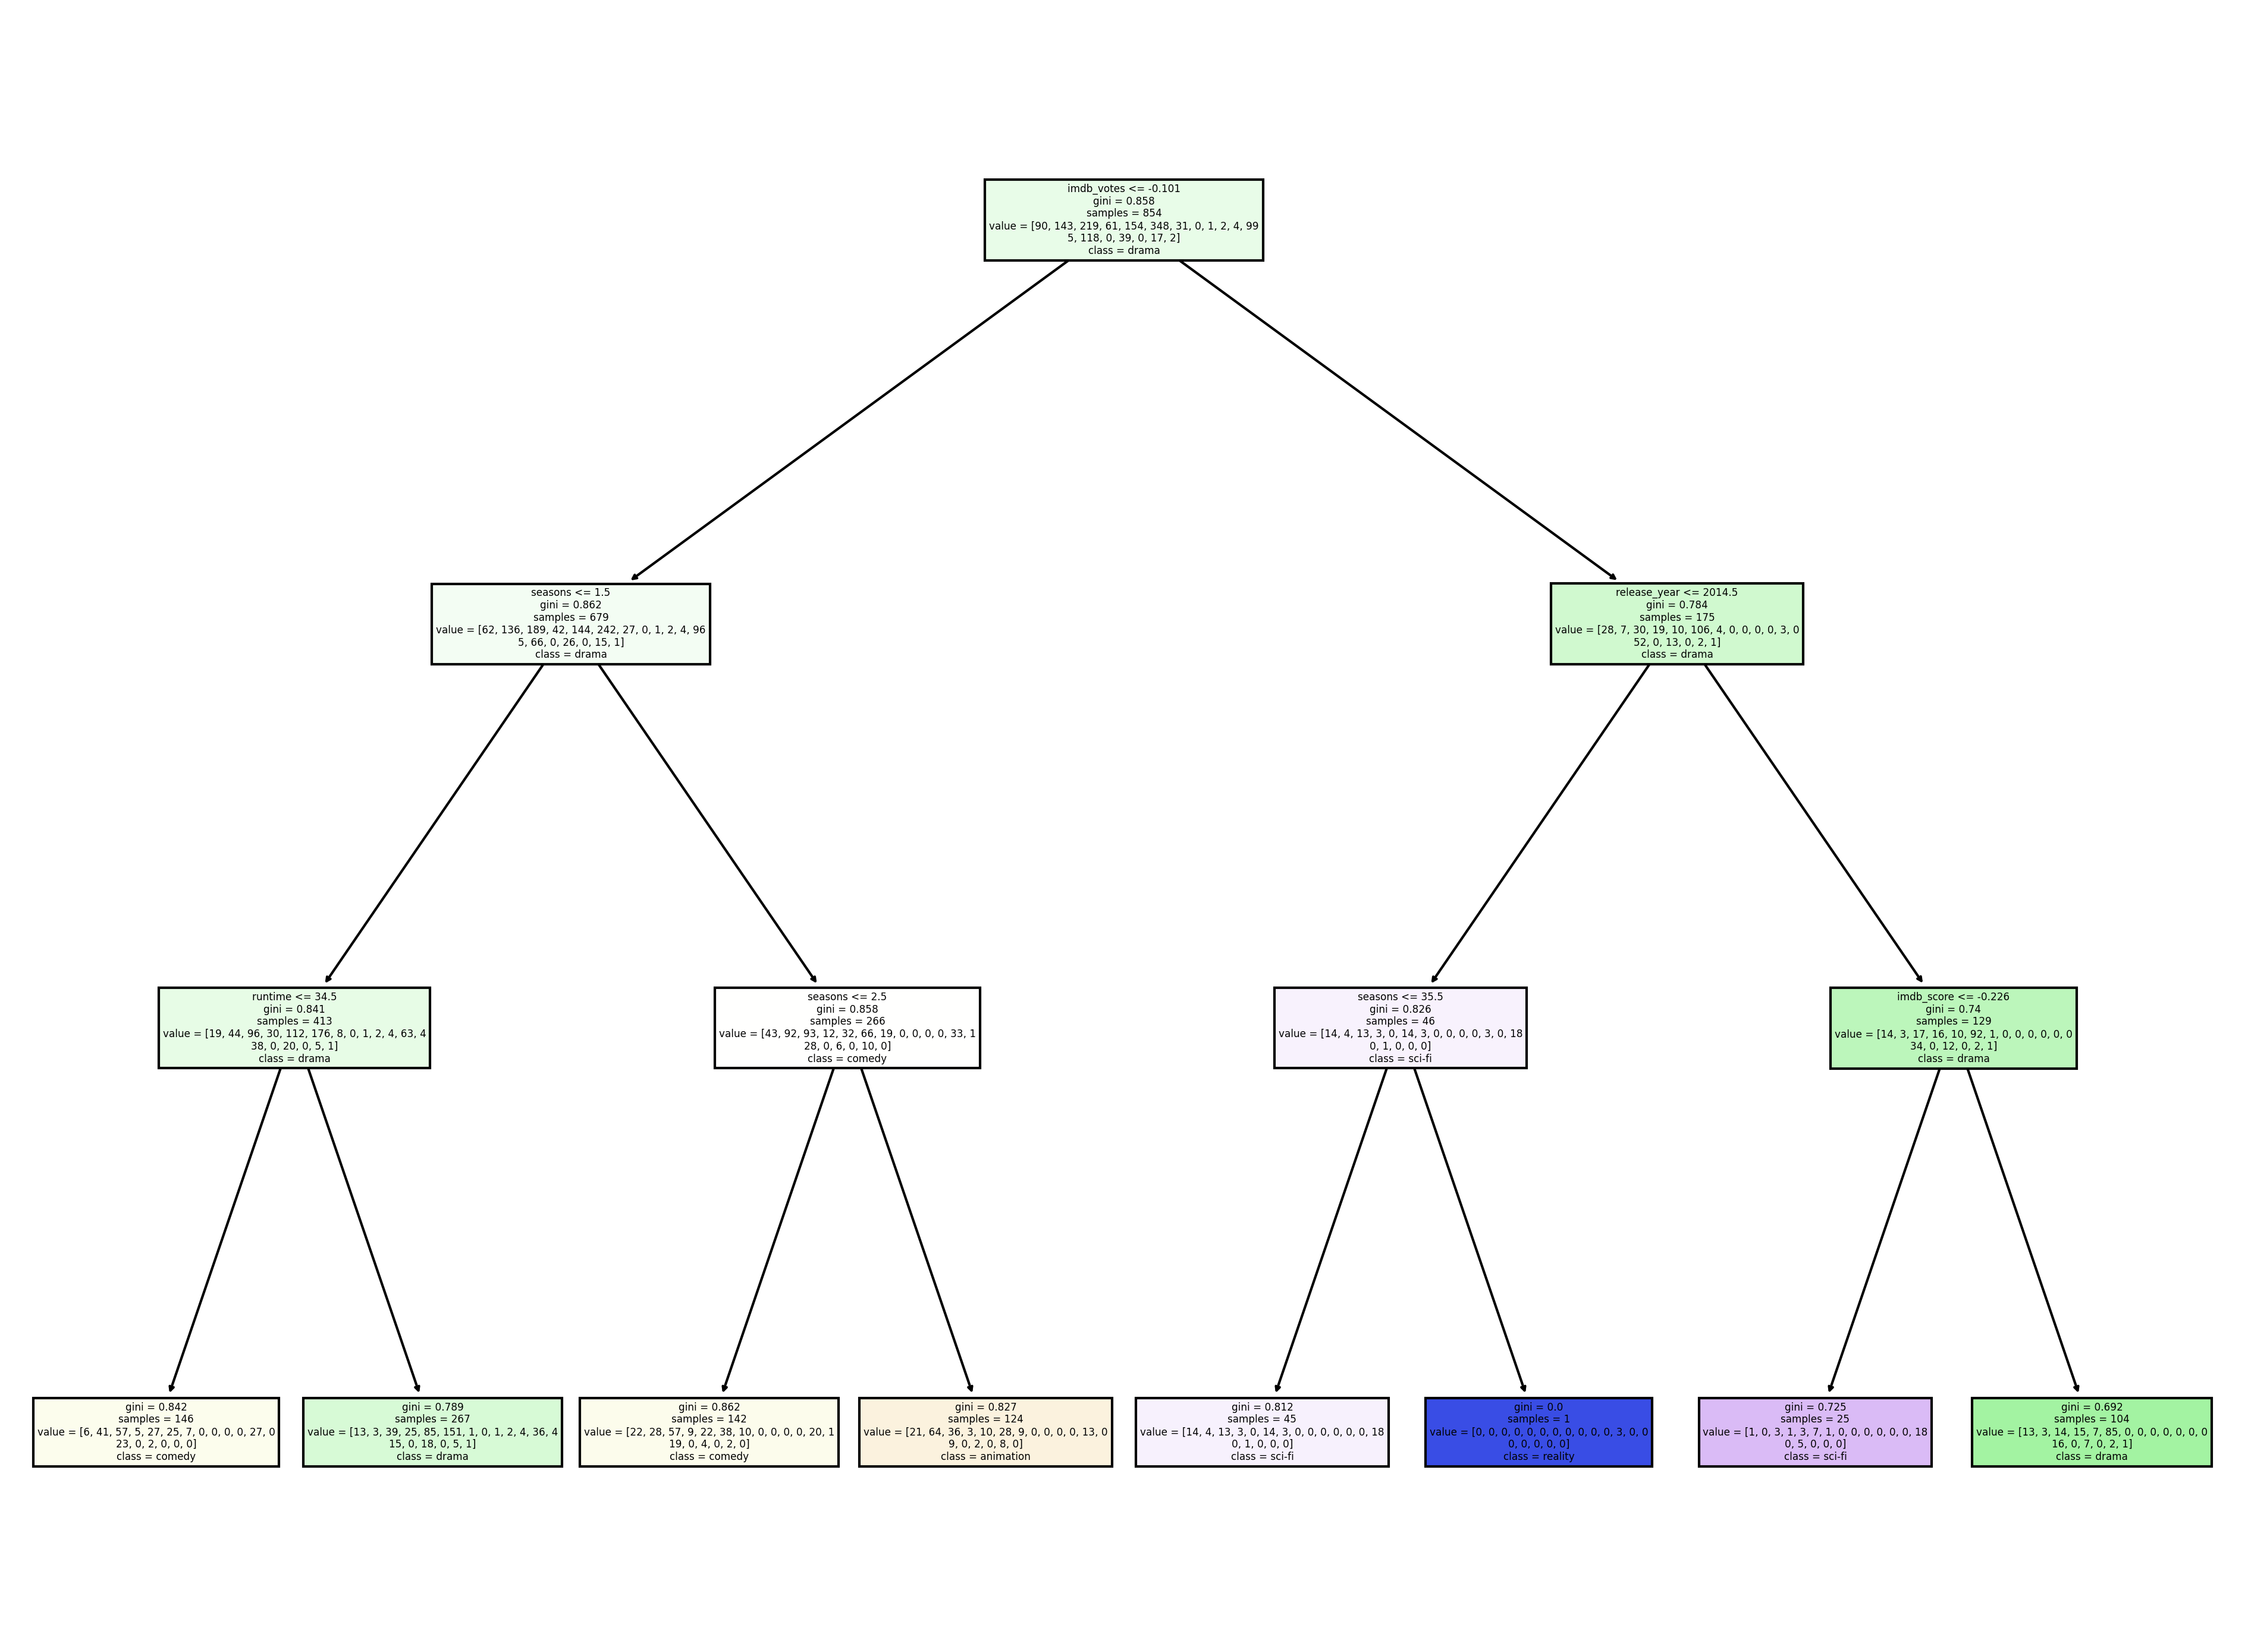

In [177]:
X = final_df.drop(columns=['genreMain','documentary', 'drama', 'fantasy', 'war', 'comedy', 'thriller',
       'crime', 'romance', 'action', 'western', 'history', 'music','horror', 'sci-fi', 'animation', 'family', 'reality', 'unknown',
       'sport'])
y = final_df['genreMain']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the random forest classifier
rfc = RandomForestClassifier(max_depth=3,random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model's performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 12), dpi=300)
plot_tree(rfc.estimators_[0], feature_names=X.columns, class_names=rfc.classes_, filled=True)
plt.savefig("rfc.jpg", dpi=300)
plt.show()